In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Setting Graph style and Font size

In [2]:
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks

plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

In [3]:
#showing palette1
sns.color_palette('deep')

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

# Line Plot

In [4]:
# preprocessing
df_fifa21 = pd.read_csv('Data/players_20.csv')
df_fifa20 = pd.read_csv('Data/players_20.csv')
df_fifa19 = pd.read_csv('Data/players_19.csv')
df_fifa18 = pd.read_csv('Data/players_18.csv')
df_fifa17 = pd.read_csv('Data/players_17.csv')

frames = [df_fifa17, df_fifa18, df_fifa19, df_fifa20, df_fifa21]

for i, frame in enumerate(frames):
    frame['year'] = 2017 + i
    
lineplot = pd.concat(frames)[['short_name', 'overall', 'year']]
list_players = ['L. Messi', 'Cristiano Ronaldo', 'K. De Bruyne', 'K. Mbappé', 'V. van Dijk']
lineplot = lineplot[lineplot['short_name'].isin(list_players)]
lineplot = lineplot.pivot(index='short_name', columns='year' ,values='overall').T
lineplot.reset_index(inplace=True)

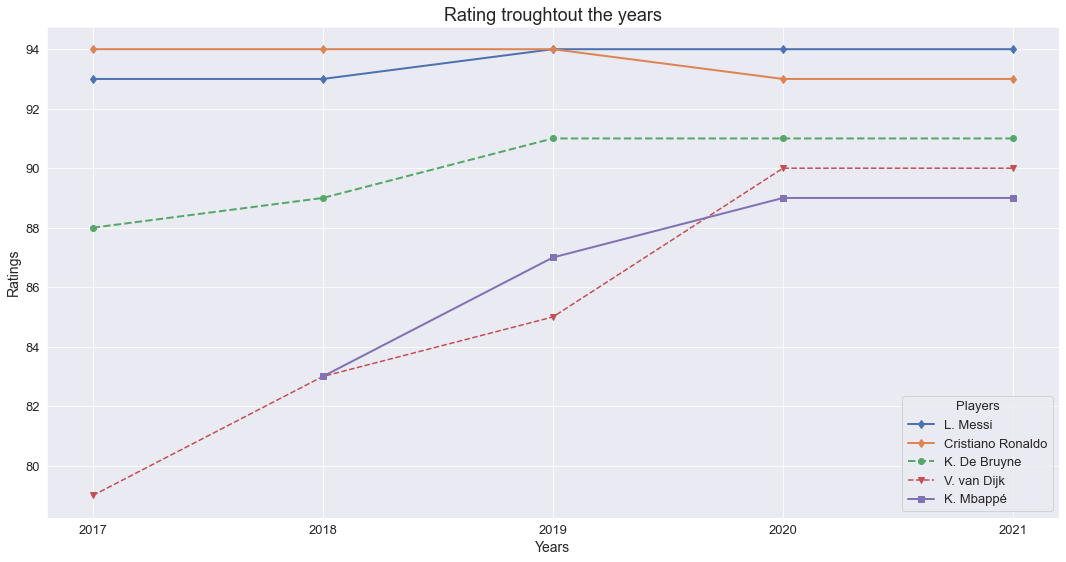

In [5]:
# # matplotlib traditional way
plt.figure(figsize=(15,8), tight_layout=True)
colors = sns.color_palette('deep') 

plt.plot(lineplot['year'], lineplot['L. Messi'], 'd-', linewidth=2, color=colors[0], label='L. Messi')
plt.plot(lineplot['year'], lineplot['Cristiano Ronaldo'], 'd-', linewidth=2, color=colors[1], label='Cristiano Ronaldo')
plt.plot(lineplot['year'], lineplot['K. De Bruyne'], 'o--', linewidth=2, color=colors[2], label='K. De Bruyne')
plt.plot(lineplot['year'], lineplot['V. van Dijk'], 'v--', color=colors[3], label='V. van Dijk')
plt.plot(lineplot['year'], lineplot['K. Mbappé'], 's-', linewidth=2, color=colors[4], label='K. Mbappé')

plt.xticks([2017, 2018, 2019, 2020, 2021])
plt.xlabel('Years')
plt.ylabel('Ratings')
plt.title('Rating troughtout the years')
plt.legend(title='Players', title_fontsize = 13)
plt.savefig('Plots/lineplot_matplot.jpg')
plt.show()

In [6]:
lineplot = lineplot.set_index('year')

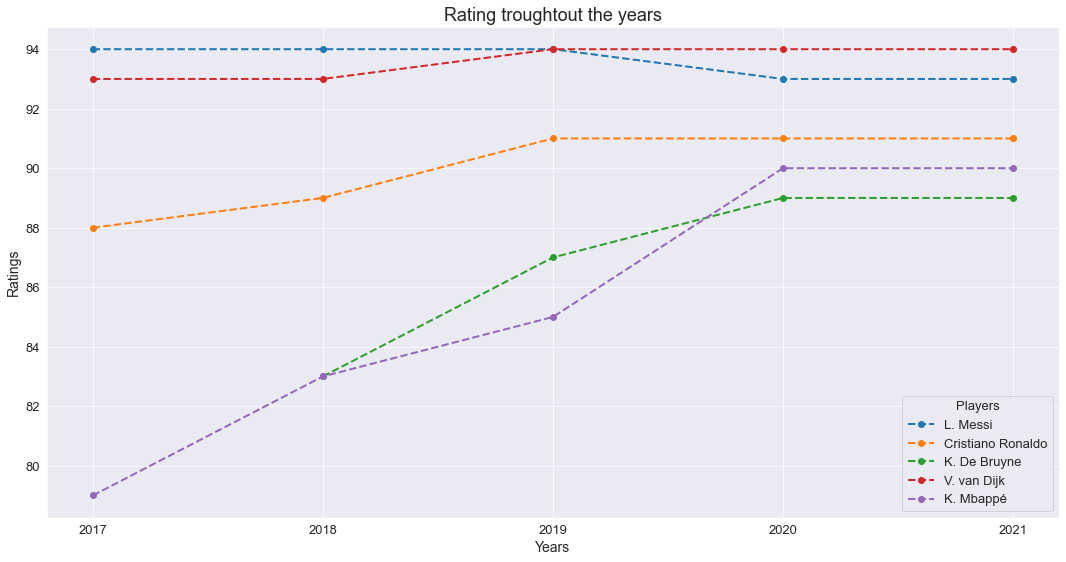

In [7]:
# matplotlib
plt.figure(figsize=(15,8), tight_layout=True)

# plotting
plt.plot(lineplot, 'o--', linewidth=2)
#customization
plt.xticks([2017, 2018, 2019, 2020, 2021])
plt.xlabel('Years')
plt.ylabel('Ratings')
plt.title('Rating troughtout the years')
plt.legend(title='Players', title_fontsize = 13, labels=['L. Messi', 'Cristiano Ronaldo', 'K. De Bruyne', 'V. van Dijk', 'K. Mbappé'])
plt.savefig('Plots/lineplot_matplot2.jpg')
plt.show()

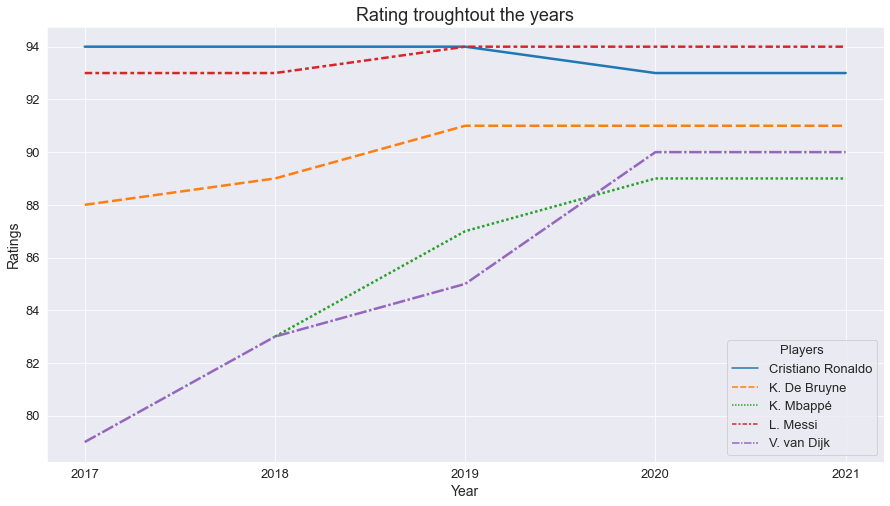

In [8]:
#seaborn
plt.figure(figsize=(15, 8))
ax = sns.lineplot(data=lineplot, linewidth=2.5)
ax.set(xlabel='Year', ylabel='Ratings', title='Rating troughtout the years', xticks=[2017, 2018, 2019, 2020, 2021])
ax.legend(title='Players', title_fontsize = 13)
plt.show()

### Preprocessing

In [9]:
country = ['United States', 'Canada', 'England', 'Brazil', 'Argentina']
df_country = df_fifa21[df_fifa21['nationality'].isin(country)]

In [10]:
# showing palette2
sns.color_palette('pastel')

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

# Barplot

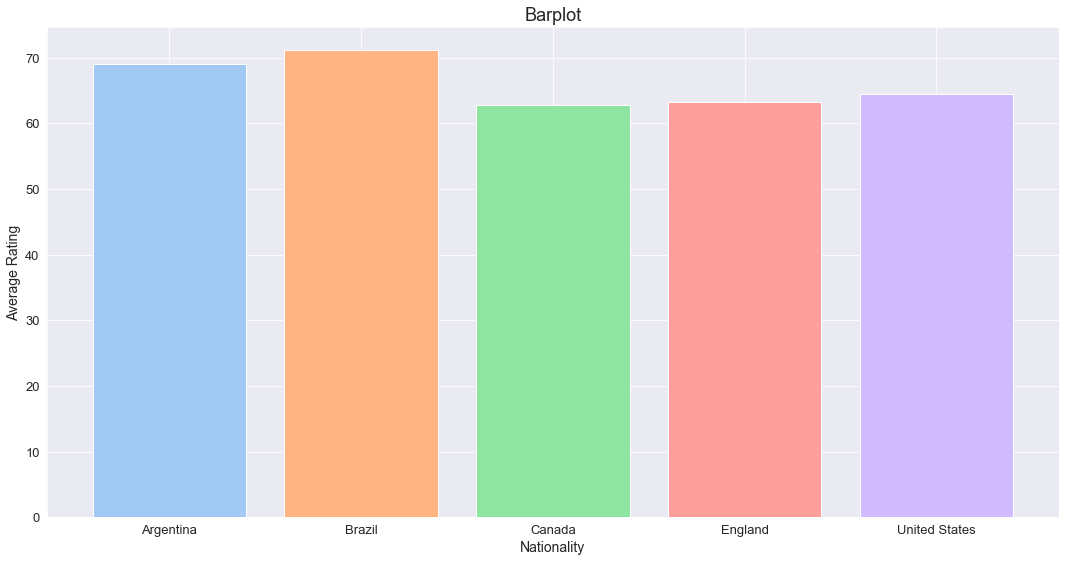

In [11]:
# Preprocessing
barplot = df_country.groupby(['nationality'], as_index=False).mean()[['nationality', 'overall']]

# matplotlib
plt.figure(figsize=(15,8), tight_layout=True)
colors = sns.color_palette('pastel')
#plotting
plt.bar(barplot['nationality'], barplot['overall'], color=colors[:5], )

plt.xlabel('Nationality')
plt.ylabel('Average Rating')
plt.title('Barplot')
plt.savefig('Plots/barplot_matplotlib.jpg')
plt.show()

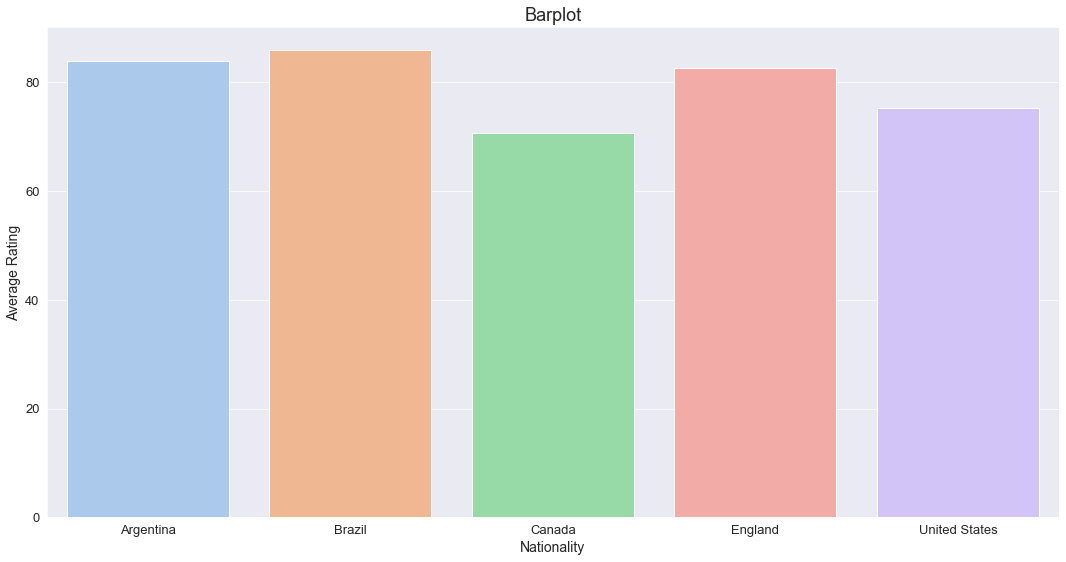

In [12]:
# preprocessing
new_df = pd.concat([df_country[df_country['nationality']=='Argentina'][:20], 
                   df_country[df_country['nationality']=='Brazil'][:20], 
                   df_country[df_country['nationality']=='England'][:20], 
                   df_country[df_country['nationality']=='Canada'][:20], 
                   df_country[df_country['nationality']=='United States'][:20]] )

barplot = new_df.groupby(['nationality'], as_index=False).mean()[['nationality', 'overall']]

# seaborn
plt.figure(figsize=(15, 8), tight_layout=True)
ax = sns.barplot(x=barplot['nationality'], y=barplot['overall'], palette='pastel', ci=None)
ax.set(title='Barplot', xlabel='Nationality', ylabel='Average Rating')
plt.savefig('Plots/barplot_seaborn.jpg')
plt.show()

### Barplot grouped by 3 variables

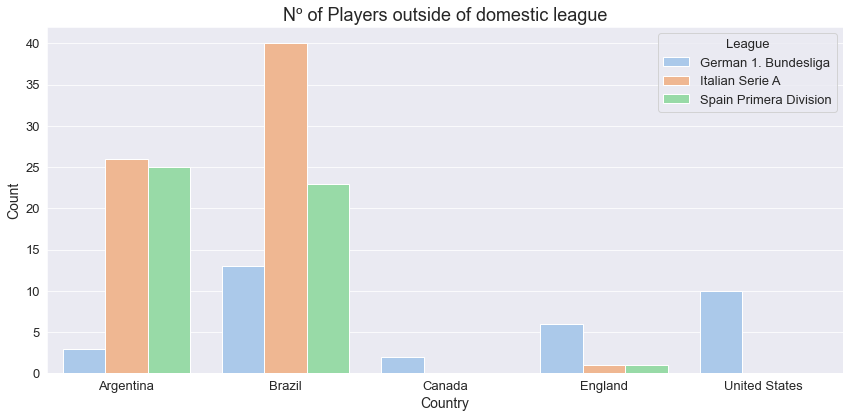

In [13]:
# Preprocessing
barplot = df_country[df_country['league_name'].isin(['Spain Primera Division', 'Italian Serie A', 'German 1. Bundesliga'])]
barplot = barplot.groupby(['nationality', 'league_name'], as_index=False).count()

# seaborn
plt.figure(figsize=(12, 6), tight_layout=True)
ax = sns.barplot(x=barplot['nationality'], y=barplot['sofifa_id'], hue=barplot['league_name'], palette='pastel')
ax.set(title='Nº of Players outside of domestic league' ,xlabel='Country', ylabel='Count')
ax.legend(title='League', title_fontsize='13', loc='upper right')
plt.savefig('Plots/barplot_grouped_seaborn.jpg')
plt.show()

In [14]:
# showing palette3
sns.color_palette('Set2')

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

# Histogram

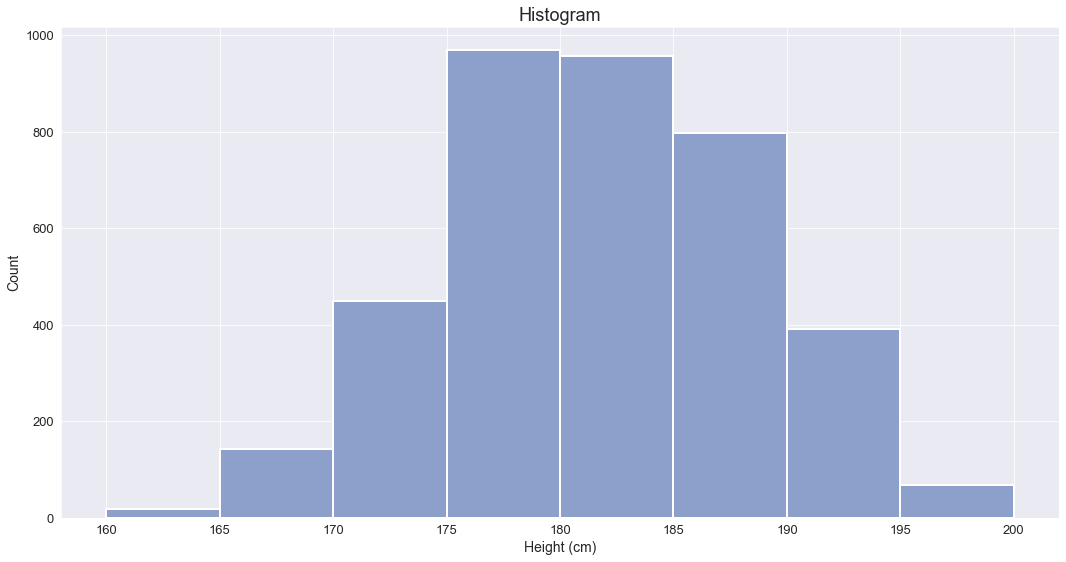

In [15]:
# matplotlib
plt.figure(figsize=(15,8), tight_layout=True)
bins = [160, 165, 170, 175, 180, 185, 190, 195, 200]
plt.hist(df_country['height_cm'], bins=bins, color=sns.color_palette('Set2')[2], linewidth=2)

plt.title('Histogram')
plt.xlabel('Height (cm)')
plt.ylabel('Count')
plt.savefig('Plots/histogram_matplotlib.jpg')
plt.show()

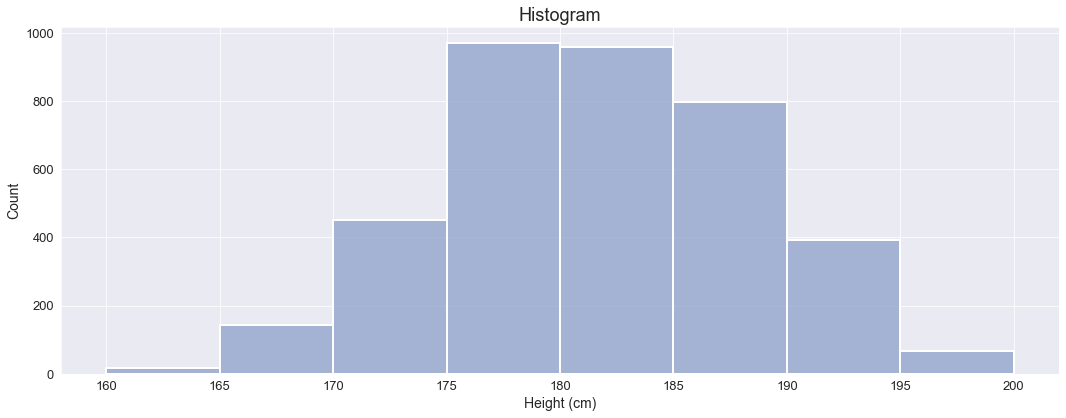

In [16]:
# seaborn
plt.figure(figsize=(15,6), tight_layout=True)
bins = [160, 165, 170, 175, 180, 185, 190, 195, 200]

ax = sns.histplot(data=df_country, x='height_cm', bins=bins, color=sns.color_palette('Set2')[2], linewidth=2)
ax.set(title='Histogram', xlabel='Height (cm)', ylabel='Count')

plt.show()

# Boxplot

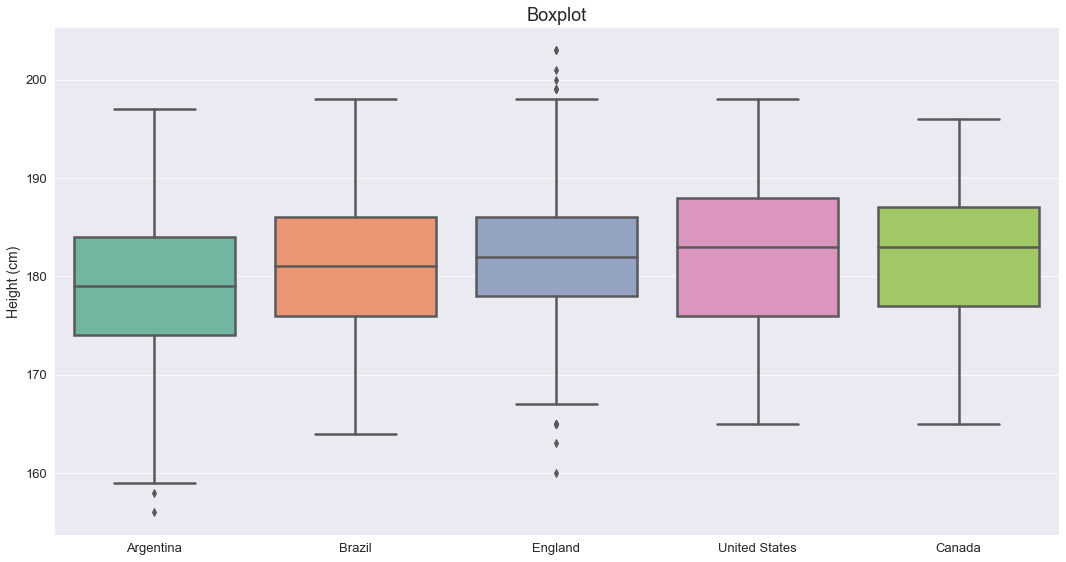

In [17]:
# matplotlib
# plt.boxplot(df_country['height_cm'])

# seaborn
plt.figure(figsize=(15,8), tight_layout=True)

# ax = sns.boxplot(x=df_country['height_cm'], color=sns.color_palette('Set2')[2], linewidth=2.5)
ax = sns.boxplot(data=df_country, x='nationality', y='height_cm', palette='Set2', linewidth=2.5)
ax.set(title='Boxplot', xlabel='', ylabel='Height (cm)')

plt.savefig('Plots/boxplot.jpg')
plt.show()

# Scatterplot

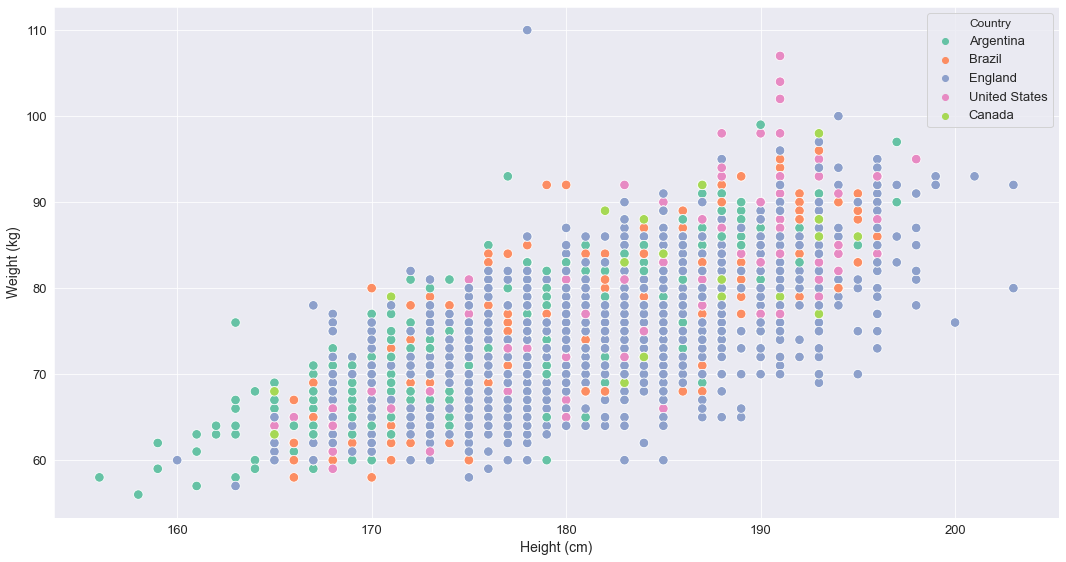

In [18]:
# matplotlib
# plt.scatter(df_country['height_cm'], df_country['weight_kg'])

# seaborn
plt.figure(figsize=(15,8), tight_layout=True)

ax = sns.scatterplot(data=df_country, x='height_cm', y='weight_kg', hue='nationality',
                     palette='Set2', s=90)
ax.set(xlabel='Height (cm)', ylabel='Weight (kg)')
ax.legend(title='Country', title_fontsize = 12) 

plt.savefig('Plots/scatterplot.jpg')
plt.show()

# Single Piechart

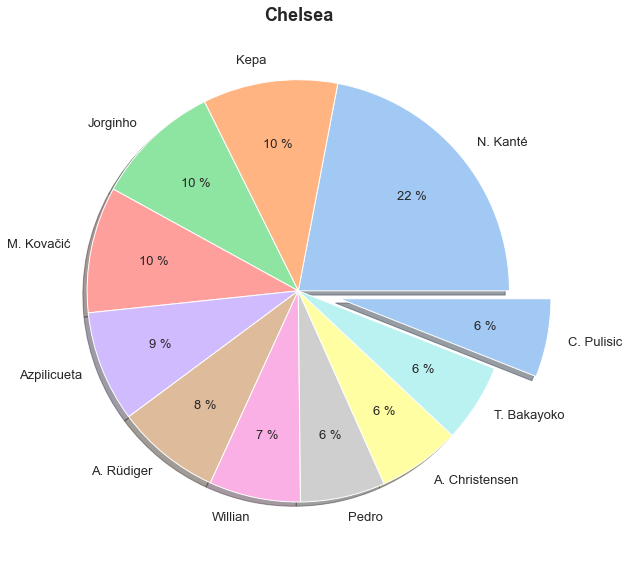

In [19]:
# Preprocessing
piechart = df_fifa21[df_fifa21['club_name']=='Chelsea']
piechart = piechart.sort_values('value_eur', ascending=False)[['short_name', 'value_eur']]
piechart = piechart[:11]

# plotting
colors = sns.color_palette('pastel')
plt.figure(figsize=(15,8), tight_layout=True)
explode_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2]
plt.pie(piechart['value_eur'], labels=piechart['short_name'], autopct='%.0f %%', explode=explode_list, pctdistance=.7,
          colors=colors, shadow=True)
plt.title('Chelsea', weight='bold')
plt.savefig('Plots/piechart.jpg')
plt.show()

# Piechart + Subplots

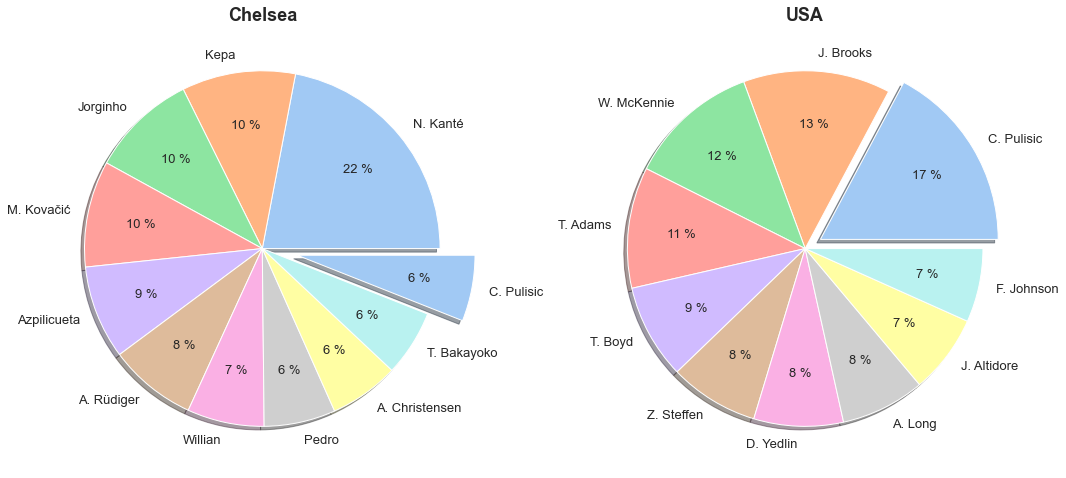

In [20]:
#subplots
fig, ax = plt.subplots(1,2, figsize=(15, 8), tight_layout=True)

# Preprocessing
piechart = df_fifa21[df_fifa21['club_name']=='Chelsea']
piechart = piechart.sort_values('value_eur', ascending=False)[['short_name', 'value_eur']][:11]

piechart2 = df_fifa21[df_fifa21['nationality']=='United States']
piechart2 = piechart2.sort_values('value_eur', ascending=False)[['short_name', 'value_eur']][:10]

# matplotlib
colors = sns.color_palette('pastel')

explode_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2]
ax[0].pie(piechart['value_eur'], labels=piechart['short_name'], autopct='%.0f %%', explode=explode_list, pctdistance=.7,
          colors=colors, shadow=True)
ax[0].set_title('Chelsea', weight='bold')

explode_list = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ax[1].pie(piechart2['value_eur'], labels=piechart2['short_name'], autopct='%.0f %%', explode=explode_list, pctdistance=.7,
          colors=colors, shadow=True)
ax[1].set_title('USA', weight='bold')

plt.savefig('Plots/piechart_subplots.jpg')
plt.show()